In [11]:
import pandas as pd
  
# Read a text file to a dataframe using colon delimiters
fish_data =  pd.read_csv('PCB.dt', sep='\t', engine='python')

In [12]:
fish_data

,year,PCB
0,1,0.6
1,6,3.4
2,1,1.6
3,6,9.7
4,1,0.5
5,6,8.6
6,1,1.2
7,7,4.0
8,2,2.0
9,7,5.5


In [16]:
#apply natural log
import numpy as np

fish_log = {}
fish_log['year'] = fish_data.loc[:,"year"]
fish_log['PCB_log'] = np.log(fish_data.loc[:,"PCB"])

df = pd.DataFrame(fish_log)
df

,year,PCB_log
0,1,-0.510826
1,6,1.223775
2,1,0.470004
3,6,2.272126
4,1,-0.693147
5,6,2.151762
6,1,0.182322
7,7,1.386294
8,2,0.693147
9,7,1.704748


In [44]:
#(X^T * X)^-1
#create X tilde in order to also integrate b and not just a

X = np.matrix([(x,1) for x in df.loc[:,"year"]])
X

matrix([[ 1,  1],
        [ 6,  1],
        [ 1,  1],
        [ 6,  1],
        [ 1,  1],
        [ 6,  1],
        [ 1,  1],
        [ 7,  1],
        [ 2,  1],
        [ 7,  1],
        [ 2,  1],
        [ 7,  1],
        [ 2,  1],
        [ 8,  1],
        [ 3,  1],
        [ 8,  1],
        [ 3,  1],
        [ 8,  1],
        [ 3,  1],
        [ 9,  1],
        [ 4,  1],
        [11,  1],
        [ 4,  1],
        [12,  1],
        [ 4,  1],
        [12,  1],
        [ 5,  1],
        [12,  1]])

In [47]:
y = np.array(df.loc[:,"PCB_log"])
y

array([-0.51082562,  1.22377543,  0.47000363,  2.27212589, -0.69314718,
        2.1517622 ,  0.18232156,  1.38629436,  0.69314718,  1.70474809,
        0.26236426,  2.35137526,  0.91629073,  2.86220088,  0.78845736,
        2.59525471,  0.87546874,  1.5040774 ,  0.18232156,  3.41444261,
        1.25276297,  2.51769647,  1.41098697,  2.59525471,  1.62924054,
        3.26575941,  1.74046617,  2.00148   ])

In [40]:
X_inverted = np.linalg.inv(np.dot(X.T, X)) #np.dot =(constant)

In [51]:
w_star = np.dot(np.dot(X_inverted, X.T),y)

In [106]:
#parameters of regression model
a = np.array(w_star)[0][0]
b = np.array(w_star)[0][1]
a,b

(0.2591282395640714, 0.031472469714475815)

In [63]:
import math
def non_linear_model(x, a, b): #x = what you want to be predicted, a,b = paramenters of linear model
    linear_pred = a * x + b
    return math.exp(linear_pred)

In [67]:
X = np.array(fish_data['year'])
Y = np.array(fish_data['PCB'])

In [72]:
#mean_squared_error 
summ = 0
for i in range(len(X)):
    summ += math.pow((Y[i] - non_linear_model(X[i], a, b)) , 2)
    
mean_squared_error = summ/len(X)
mean_squared_error

34.83556116722035

In [194]:
not_trasformed_years = np.array(df.loc[:,"year"])
predictions = np.array([np.log(non_linear_model(x,a,b)) for x in not_trasformed_years])
log_PCB = np.array(fish_log['PCB_log'])

In [195]:
predictions

array([3.85547914e-03, 5.99688699e+00, 3.85547914e-03, 5.99688699e+00,
       3.85547914e-03, 5.99688699e+00, 3.85547914e-03, 7.19549330e+00,
       1.20246178e+00, 7.19549330e+00, 1.20246178e+00, 7.19549330e+00,
       1.20246178e+00, 8.39409960e+00, 2.40106808e+00, 8.39409960e+00,
       2.40106808e+00, 8.39409960e+00, 2.40106808e+00, 9.59270590e+00,
       3.59967439e+00, 1.19899185e+01, 3.59967439e+00, 1.31885248e+01,
       3.59967439e+00, 1.31885248e+01, 4.79828069e+00, 1.31885248e+01])

Text(0.5, 0, 'years')

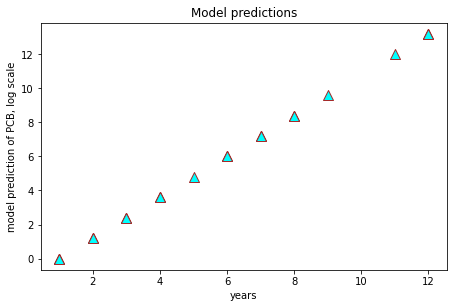

In [197]:
import matplotlib.pyplot as plt

#plot 1:
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
plt.scatter(not_trasformed_years, predictions, c = "aqua", linewidths = 1, marker ="^", edgecolor ="brown", s = 100)
plt.title("Model predictions")
plt.ylabel("model prediction of PCB, log scale")
plt.xlabel("years")


In [102]:
result = 0
mean_traning_labels = np.mean(Y)
for y in Y:
    result += math.pow(y - mean_traning_labels, 2)

1516.9771428571423

In [103]:
#coefficient of determination R2

R2 = 1 - (summ / result) 
R2

0.3570135731609865

# Second model, input transformation

In [169]:
X = np.matrix([(x**(1/2),1) for x in df.loc[:,"year"]])
X

matrix([[1.        , 1.        ],
        [2.44948974, 1.        ],
        [1.        , 1.        ],
        [2.44948974, 1.        ],
        [1.        , 1.        ],
        [2.44948974, 1.        ],
        [1.        , 1.        ],
        [2.64575131, 1.        ],
        [1.41421356, 1.        ],
        [2.64575131, 1.        ],
        [1.41421356, 1.        ],
        [2.64575131, 1.        ],
        [1.41421356, 1.        ],
        [2.82842712, 1.        ],
        [1.73205081, 1.        ],
        [2.82842712, 1.        ],
        [1.73205081, 1.        ],
        [2.82842712, 1.        ],
        [1.73205081, 1.        ],
        [3.        , 1.        ],
        [2.        , 1.        ],
        [3.31662479, 1.        ],
        [2.        , 1.        ],
        [3.46410162, 1.        ],
        [2.        , 1.        ],
        [3.46410162, 1.        ],
        [2.23606798, 1.        ],
        [3.46410162, 1.        ]])

In [170]:
Y = np.array(np.log(fish_data.loc[:,"PCB"]))
Y

array([-0.51082562,  1.22377543,  0.47000363,  2.27212589, -0.69314718,
        2.1517622 ,  0.18232156,  1.38629436,  0.69314718,  1.70474809,
        0.26236426,  2.35137526,  0.91629073,  2.86220088,  0.78845736,
        2.59525471,  0.87546874,  1.5040774 ,  0.18232156,  3.41444261,
        1.25276297,  2.51769647,  1.41098697,  2.59525471,  1.62924054,
        3.26575941,  1.74046617,  2.00148   ])

In [171]:
X_inverted = np.linalg.inv(np.dot(X.T, X)) #np.dot =(constant)
w_star = np.dot(np.dot(X_inverted, X.T),Y)
#parameters of regression model
a = np.array(w_star)[0][0]
b = np.array(w_star)[0][1]
a,b

(1.1986063028078175, -1.1947508236636466)

In [ ]:
def second_model(x, a, b): #x = what you want to be predicted, a,b = paramenters of linear model
    linear_pred = a * x + b
    return math.exp(linear_pred)

In [175]:
X = np.array([x**(1/2) for x in df.loc[:,"year"]])
Y_label = np.array(fish_data.loc[:,"PCB"])

In [176]:
#mean_squared_error 
summ = 0
for i in range(len(X)):
    summ += math.pow((Y_label[i] - non_linear_model(X[i], a, b)) , 2)
    
mean_squared_error = summ/len(X)
mean_squared_error

28.084390174944378

In [183]:
#Then plot the target(on logarithmic scale) and the model output over the original inputs (linearscale). That is, the unit of the x-axis should be years.
target = np.array(np.log(fish_data.loc[:,"PCB"]))
linear_X = np.array([x for x in df.loc[:,"year"]])
predicted_linear = np.array([np.log(non_linear_model(x, a, b)) for x in linear_X])

Text(0.5, 0, 'years')

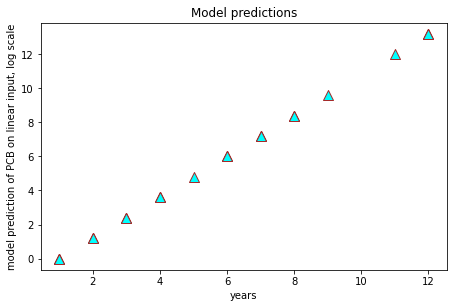

In [185]:
import matplotlib.pyplot as plt

#plot 1:
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
plt.scatter(linear_X, predicted_linear, c = "aqua", linewidths = 1, marker ="^", edgecolor ="brown", s = 100)
plt.title("Model predictions")
plt.ylabel("model prediction of PCB on linear input, log scale")
plt.xlabel("years")

In [190]:
#coefficient of determination R2
#mean_squared_error 

result = 0
mean_traning_labels = np.mean(Y_label)
for y in Y_label:
    result += math.pow(y - mean_traning_labels, 2)
R2 = 1 - (summ / result) 
R2

0.4816250669292409